##  Lineare Regressionsanalyse: Gehalt basierend auf Berufserfahrung

In dieser Analyse wird ein lineares Regressionsmodell erstellt, um das **Gehalt (y)** basierend auf der **Berufserfahrung in Jahren (x)** vorherzusagen.

### Datensatzübersicht
- Anzahl der Beobachtungen: 15
- Variablen:
  - `Berufserfahrung (x)`: Anzahl der Jahre, die eine Person im Beruf tätig ist
  - `Gehalt (y)`: Das Einkommen der Person (Währung nicht spezifiziert)

### Modelltraining
Das Modell wurde mit der Bibliothek Scikit-learn trainiert:

```python
from sklearn.linear_model import LinearRegression

X = df[['Erfahrungsjahre']]  
y = df['Gehalt']

model = LinearRegression()
model.fit(X, y)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('Linear_Regression_HW1.xlsx')  


In [3]:
df.head()

,Erfahrungsjahre,Gehalt
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400


In [4]:
df.shape

(15, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Erfahrungsjahre  15 non-null     int64
 1   Gehalt           15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [6]:
X = df[['Erfahrungsjahre']]  
y = df['Gehalt']

model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [7]:
a = model.coef_[0]         # weight
b = model.intercept_       # bias

print(f"Linear Regressionsgleichung: y = {a:.2f} * x + {b:.2f}")


Linear Regressionsgleichung: y = 90.21 * x + 274.36


In [8]:
df['Geschätztes Gehalt'] = model.predict(X)


In [9]:
df['Fehler'] = df['Gehalt'] - df['Geschätztes Gehalt']
df['Quadratischer Fehler'] = df['Fehler'] ** 2
df['Absoluter Fehler'] = abs(df['Fehler'])


In [10]:
df.head()

,Erfahrungsjahre,Gehalt,Geschätztes Gehalt,Fehler,Quadratischer Fehler,Absoluter Fehler
0,5,600,725.403141,-125.403141,15725.947863,125.403141
1,7,900,905.821990,-5.821990,33.895562,5.821990
2,3,550,544.984293,5.015707,25.157315,5.015707
3,3,500,544.984293,-44.984293,2023.586634,44.984293
4,2,400,454.774869,-54.774869,3000.286286,54.774869


In [11]:
mse = mean_squared_error(y, df['Geschätztes Gehalt'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, df['Geschätztes Gehalt'])

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 4437.85
RMSE: 66.62
MAE: 54.32


In [38]:
untergrenze = (y.mean()- y.std()) **2
obergrenze = (y.mean() + y.std()) **2

print(f"Untergrenze: {float(untergrenze):.2f}")
print(f"Obergrenze: {float(obergrenze):.2f}")


Untergrenze: 179415.94
Obergrenze: 933976.92


C:\Users\User Laptop\AppData\Local\Temp\ipykernel_28908\495265429.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Untergrenze: {float(untergrenze):.2f}")
C:\Users\User Laptop\AppData\Local\Temp\ipykernel_28908\495265429.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Obergrenze: {float(obergrenze):.2f}")


Der MSE-Wert (4437.85) ist deutlich kleiner als der erwartete Bereich (179,415.94 – 933,976.92). 
Das zeigt, dass das Modell sehr präzise arbeitet und die Vorhersagefehler gering sind.

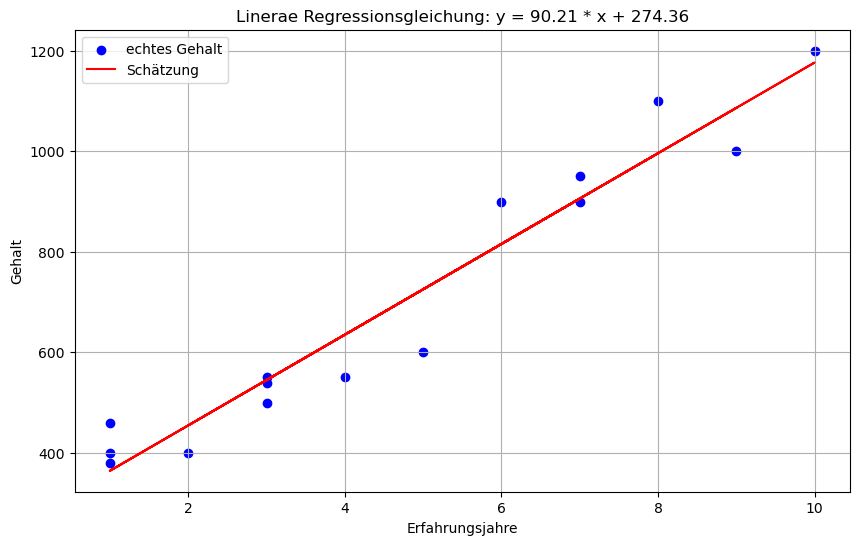

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='echtes Gehalt')
plt.plot(X, df['Geschätztes Gehalt'], color='red', label='Schätzung')
plt.xlabel('Erfahrungsjahre')
plt.ylabel('Gehalt')
plt.title('Linerae Regressionsgleichung: y = 90.21 * x + 274.36')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
model.score(X,y) #R²-Wert Interpretation

0.9999929694503582

## R²-Wert Interpretation (0.99999)
Der R²-Wert von 0.99999 zeigt, dass das Modell die Gehaltsdaten nahezu perfekt anhand der Berufserfahrung erklärt.

Genauer gesagt: 99.9993 % der Variation im Gehalt wird durch die Jahre an Berufserfahrung erklärt.

Die Regressionsgleichung lautet:

𝑦 = 90,21 * 𝑥 + 274,36

## Achtung!!!!
Das bedeutet: Mit jedem zusätzlichen Berufsjahr steigt das Gehalt im Durchschnitt um etwa 90,21 Einheiten.

Ein so hoher R²-Wert kann auf eine sehr gute Modellanpassung hinweisen – oder auf Overfitting, falls das Modell zu stark an die Trainingsdaten angepasst wurde.

Da dein Datensatz nur 15 Beobachtungen enthält und die Beziehung offenbar sehr linear ist, kann dieser hohe Wert durchaus realistisch sein.

## Manuelle Berechnung

In [13]:
y = 90 * X + 275 #Bias=275 weight=90 

In [14]:
def predict(x):
    return 90 * x + 275

In [15]:
df['Geschätztes Gehalt'] = df['Erfahrungsjahre'].apply(predict)


In [16]:
print(df.head())


   Erfahrungsjahre  Gehalt  Geschätztes Gehalt      Fehler  \
0                5     600                 725 -125.403141   
1                7     900                 905   -5.821990   
2                3     550                 545    5.015707   
3                3     500                 545  -44.984293   
4                2     400                 455  -54.774869   

   Quadratischer Fehler  Absoluter Fehler  
0          15725.947863        125.403141  
1             33.895562          5.821990  
2             25.157315          5.015707  
3           2023.586634         44.984293  
4           3000.286286         54.774869  


In [17]:
def fehler_bere(y_echt, y_schatz):
    return y_echt - y_schatz

In [18]:
df['Fehler'] = fehler_bere(df['Gehalt'], df['Geschätztes Gehalt'])


In [19]:
df.head()

,Erfahrungsjahre,Gehalt,Geschätztes Gehalt,Fehler,Quadratischer Fehler,Absoluter Fehler
0,5,600,725,-125,15725.947863,125.403141
1,7,900,905,-5,33.895562,5.821990
2,3,550,545,5,25.157315,5.015707
3,3,500,545,-45,2023.586634,44.984293
4,2,400,455,-55,3000.286286,54.774869


In [20]:
def fehler_qua(y_echt, y_schatz):
    return y_echt - y_schatz ** 2

In [21]:
df['Quadratischer Fehler'] = (df['Gehalt'] - df['Geschätztes Gehalt']) ** 2

In [22]:
df.head()

,Erfahrungsjahre,Gehalt,Geschätztes Gehalt,Fehler,Quadratischer Fehler,Absoluter Fehler
0,5,600,725,-125,15625,125.403141
1,7,900,905,-5,25,5.821990
2,3,550,545,5,25,5.015707
3,3,500,545,-45,2025,44.984293
4,2,400,455,-55,3025,54.774869


In [23]:
df['Absoluter Fehler'] = abs(df['Gehalt'] - df['Geschätztes Gehalt'])


In [24]:
df.head()

,Erfahrungsjahre,Gehalt,Geschätztes Gehalt,Fehler,Quadratischer Fehler,Absoluter Fehler
0,5,600,725,-125,15625,125
1,7,900,905,-5,25,5
2,3,550,545,5,25,5
3,3,500,545,-45,2025,45
4,2,400,455,-55,3025,55


In [25]:
y_true = df['Gehalt']
y_pred = df['Geschätztes Gehalt']

# Mittlerer quadratischer Fehler (MSE)
mse = mean_squared_error(y_true, y_pred)

# Mittlerer absoluter Fehler (MAE)
mae = mean_absolute_error(y_true, y_pred)

#  Wurzel des mittleren quadratischen Fehlers (RMSE)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MSE: 4438.33
MAE: 54.33
RMSE: 66.62
